libpng warning: iCCP: known incorrect sRGB profile
/Users/luispe/Documents/Inteligencia Artificial /OCR/.venv/lib/python3.14/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/luispe/Documents/Inteligencia Artificial /OCR/.venv/lib/python3.14/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/luispe/Documents/Inteligencia Artificial /OCR/.venv/lib/python3.14/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Imágenes cargadas: 2417
Etiquetas únicas: {np.str_('U'), np.str_('y'), np.str_('E'), np.str_('L'), np.str_('C'), np.str_('c'), np.str_('P'), np.str_('g'), np.str_('i'), np.str_('F'), np.str_('h'), np.str_('o'), np.str_('G'), np.str_('V'), np.str_('m'), np.str_('4'), np.str_('x'), np.str_('j'), np.str_('I'), np.str_('r'), np.str_('w'), np.str_('f'), np.str_('Q'), np.str_('e'), np.str_('6'), np.str_('s'), np.str_('S'), np.str_('2'), np.str_('D'), np.str_('b'), np.str_('R'), np.str_('a'), np.str_('v'), np.str_('z'), np.str_('3'), np.str_('d'), np.str_('J'), np.str_('l'), np.str_('0'), np.str_('q'), np.str_('X'), np.str_('7'), np.str_('M'), np.str_('n'), np.str_('t'), np.str_('O'), np.str_('ñ'), np.str_('Z'), np.str_('u'), np.str_('5'), np.str_('B'), np.str_('T'), np.str_('Ñ'), np.str_('W'), np.str_('H'), np.str_('p'), np.str_('K'), np.str_('k'), np.str_('8'), np.str_('9'), np.str_('Y'), np.str_('1'), np.str_('A'), np.str_('N')}
Precisión del modelo: 0.13636363636363635
Procesando imagen: 

/Users/luispe/Documents/Inteligencia Artificial /OCR/.venv/lib/python3.14/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/luispe/Documents/Inteligencia Artificial /OCR/.venv/lib/python3.14/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/luispe/Documents/Inteligencia Artificial /OCR/.venv/lib/python3.14/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


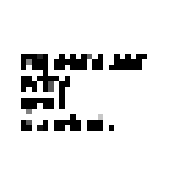

Texto reconocido: J
Confianza promedio: 29.07%
--------------------------------------------------
Procesando imagen: test_images/Ejemplo.png


/Users/luispe/Documents/Inteligencia Artificial /OCR/.venv/lib/python3.14/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/luispe/Documents/Inteligencia Artificial /OCR/.venv/lib/python3.14/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/luispe/Documents/Inteligencia Artificial /OCR/.venv/lib/python3.14/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


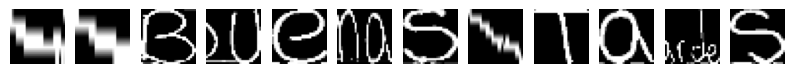

Texto reconocido: WbM107gb1QHy
Confianza promedio: 59.63%
--------------------------------------------------


/Users/luispe/Documents/Inteligencia Artificial /OCR/.venv/lib/python3.14/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/luispe/Documents/Inteligencia Artificial /OCR/.venv/lib/python3.14/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/luispe/Documents/Inteligencia Artificial /OCR/.venv/lib/python3.14/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/luispe/Documents/Inteligencia Artificial /OCR/.venv/lib/python3.14/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/luispe/Documents/Inteligencia Artificial /OCR/.venv/lib/python3.14/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/luispe/Documents/Inteligencia Artificial /OCR/.venv/lib/python3.14/site-packages/

In [2]:
# %% [code]
import sys
sys.path.append("Src")

# %% [code]
import os
import cv2
import matplotlib.pyplot as plt
from preprocesamiento import load_dataset
from segmentation import segment_characters
from recognition import recognize_text
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# %% [code]
# Cargar el dataset
X, y = load_dataset("Data")
print("Imágenes cargadas:", len(X))

# Verificar etiquetas únicas
print("Etiquetas únicas:", set(y))

# %% [code]
# Convertir etiquetas a números
le = LabelEncoder()
y = le.fit_transform(y)

# Aplanar las imágenes (de 64x64 a 4096)
X_flat = X.reshape(X.shape[0], -1)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# %% [code]
# Entrenar el modelo
clf = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1500, random_state=42)
clf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = clf.predict(X_test)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

# %% [code]
# Procesar múltiples imágenes de texto
test_images_folder = "test_images"
test_images = [os.path.join(test_images_folder, f) for f in os.listdir(test_images_folder) if f.endswith(".png")]

for img_path in test_images:
    print(f"Procesando imagen: {img_path}")
    
    # Leer y preprocesar la imagen
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    _, img_bin = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
    img_bin = img_bin / 255.0

    # Segmentar los caracteres de la imagen
    chars = segment_characters(img_bin)

    # Visualizar los caracteres segmentados
    plt.figure(figsize=(10, 2))
    for i, c in enumerate(chars):
        plt.subplot(1, len(chars), i+1)
        plt.imshow(c, cmap='gray')
        plt.axis('off')
    plt.show()

    # Reconocer el texto a partir de los caracteres segmentados
    texto, avg_confidence = recognize_text(chars, clf, le)
    print("Texto reconocido:", texto)
    print(f"Confianza promedio: {avg_confidence:.2f}%")
    print("-" * 50)